INFO:tensorflow:Restoring parameters from ./pesos/pesos-1504906856.7555995.ckpt
Loss: -9.49643e+12
Loss: -2.16967e+13
Loss: 5.03698e+11
Loss: -2.33736e+13
Loss: -9.83141e+12
Loss: -9.95391e+11
Loss: -6.47138e+13
Loss: -1.36944e+13
Loss: -2.04936e+12
Loss: -4.26799e+13
Loss: -2.03579e+13
Loss: 8.77843e+12
Loss: -3.61717e+13
Loss: -1.88635e+13
Loss: -1.20621e+13
Loss: -9.37761e+12
Loss: -2.33988e+13
Loss: -2.70545e+13
Loss: -3.59487e+13
Loss: -6.3063e+13
Loss: -2.92397e+13
Loss: -1.14345e+13
Loss: -3.58595e+13
Loss: -5.43585e+13
Loss: -1.37664e+13
Loss: -9.5435e+13
Loss: -2.08397e+13
Loss: -5.52834e+13
Loss: -1.30663e+13
Loss: -1.78887e+13
Loss: -3.35598e+13
Loss: -1.41988e+13
Loss: -3.01228e+13
Loss: -3.19756e+13
Loss: -5.60183e+13
Loss: -3.09674e+13
Loss: -4.28593e+13
Loss: -2.584e+13
Loss: -3.82284e+13
Loss: -5.58385e+13
Loss: -1.56412e+13
Loss: -1.05541e+14
Loss: -5.37234e+12
Loss: -9.15416e+12
Loss: -4.93744e+13
Loss: -2.9264e+13
Loss: -5.57786e+13
Loss: -5.36497e+13
Loss: -5.76203e

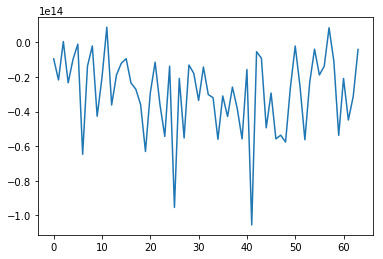

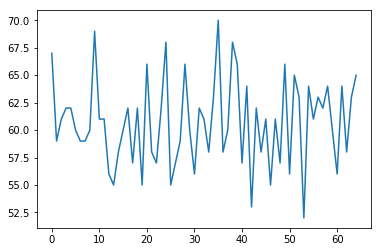

Wins (Average Last 1000 games Rede X Aleatorio): 59.0
Losses (Average Last 1000 values): -9.49643e+12
Loss: -3.65195e+13
Loss: -4.16293e+13
Loss: -1.22014e+13
Loss: -3.79092e+13
Loss: -2.53686e+13
Loss: -6.96592e+13
Loss: -1.76077e+13
Loss: -5.49588e+13
Loss: -7.85228e+13
Loss: -3.27976e+13
Loss: -7.29373e+13
Loss: -3.13166e+13
Loss: -2.60196e+13
Loss: -7.41647e+13
Loss: -3.1961e+12
Loss: -3.67305e+13
Loss: -3.75897e+13
Loss: -1.0719e+13
Loss: -1.50731e+13
Loss: -7.27152e+13
Loss: -5.97097e+13
Loss: -3.14673e+13
Loss: -7.54934e+13
Loss: -5.07e+13
Loss: -7.52566e+13
Loss: -1.92777e+13
Loss: -3.93011e+13
Loss: -6.30345e+13
Loss: -7.84078e+13
Loss: -4.87818e+13
Loss: -7.27965e+13
Loss: -5.53503e+13
Loss: -4.07919e+13
Loss: -8.33184e+13
Loss: -2.54273e+13
Loss: -3.05674e+13
Loss: -4.03146e+13
Loss: -2.70957e+13
Loss: -3.37299e+13
Loss: -5.61388e+12
Loss: -4.50468e+13
Loss: -3.20856e+13
Loss: -5.27351e+13
Loss: -4.32407e+13
Loss: -8.70718e+13
Loss: -4.38176e+13
Loss: -6.14797e+13
Loss: -4.5

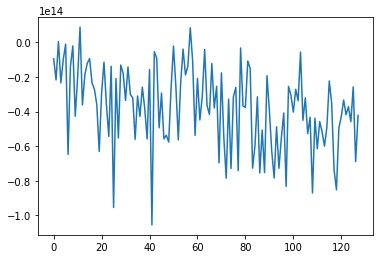

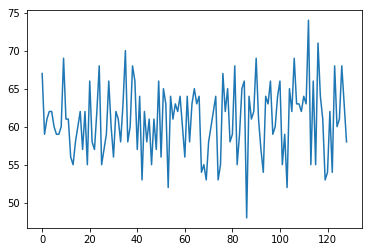

Wins (Average Last 1000 games Rede X Aleatorio): 63.0
Losses (Average Last 1000 values): -3.65195e+13
Loss: -6.01431e+13
Loss: -8.36117e+13
Loss: -7.20724e+13
Loss: -2.86044e+13
Loss: -3.94149e+13
Loss: -4.42222e+13
Loss: -1.0065e+14
Loss: -2.05898e+13
Loss: -7.71079e+13
Loss: -9.1665e+13
Loss: -1.86302e+13
Loss: -8.07449e+13
Loss: -3.02765e+13
Loss: -3.75314e+13
Loss: -6.29778e+13
Loss: -2.69849e+13
Loss: -5.09834e+13
Loss: -9.69153e+13
Loss: -8.05216e+13
Loss: -6.83113e+13
Loss: -5.94291e+13
Loss: -3.56282e+13
Loss: -2.89307e+13
Loss: -3.18397e+13
Loss: -1.95682e+13
Loss: -2.85183e+13
Loss: -3.29093e+13
Loss: -2.77499e+13
Loss: -9.55603e+13
Loss: -6.79467e+12
Loss: -2.32092e+13
Loss: -6.85417e+13
Loss: -2.38918e+13
Loss: -5.00468e+13
Loss: -3.53349e+13
Loss: 5.49356e+12
Loss: -4.51056e+13
Loss: -7.67438e+12
Loss: -8.10412e+13
Loss: -4.37712e+13
Loss: -3.18465e+13
Loss: -4.32055e+13
Loss: -4.13839e+13
Loss: -1.73924e+13


In [ ]:
#Imports
import numpy as np
import tensorflow as tf
from othello import Board
from copy import deepcopy
import matplotlib.pyplot as plt
import time
import os.path

#Define print de matrizes inteiras no numpy
np.set_printoptions(threshold=np.nan)

#Printa se o modo for verbose
def maybePrint(shouldI, s):
    if(shouldI):
        print(s)

#Reseta computational graph
def reset_graph():
    #Verifica se existe uma sessão aberta
    if("sess" in globals() and sess):
        #Fecha a sessão
        sess.close()
    #Destroi o grafo remanescente
    tf.reset_default_graph()
    
#Salva dados de variaveis para o tensorboard 
def variable_summaries(var):
    #No escopo summaries
    with tf.name_scope('summaries'):
        #Calcula media
        mean = tf.reduce_mean(var)
        #Salva para tensorboard
        tf.summary.scalar('mean', mean)
    #No escopo stddev
    with tf.name_scope('stddev'):
        #Calcula desvio padrão
        stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
    #Salva desvio padrão para tensorboard
    tf.summary.scalar('stddev', stddev)
    #Salva maximo para tensorboard
    tf.summary.scalar('max', tf.reduce_max(var))
    #Salva minimo para tensorboard
    tf.summary.scalar('min', tf.reduce_min(var))
    #Salva histogram para tensorboard
    tf.summary.histogram('histogram', var)

#Constroi computational graph
def buildGraph(inputDim, dataType, hLayersDim, learning_rate = 0.01, name="player"):
    #No escopo "name"
    with tf.variable_scope(name):
        #Cria placeholder para receber o Estado Atual [batch, board]
        x = tf.placeholder(dataType, [None, inputDim])
        #Cria placeholder para receber as actions [actionNum]
        actions = tf.placeholder(tf.int32, [None])
        #Cria placeholder para receber as rewards [RewardVal]
        rewards = tf.placeholder(dataType, [None])

        #Array de Pesos
        layers = []
        #Array de Biases
        biases = []

        #No escopo Weights
        with tf.variable_scope("Weights"):
            #Cria Primeira camada (camada q recebe input)
            layers.append(tf.get_variable("W0", [inputDim, hLayersDim[0]], dataType, initializer=tf.contrib.layers.xavier_initializer()))
            #Calcula dados e adiciona ao tensorboard
            variable_summaries(layers[-1])
            #Cria Segunda camada (camada q recebe dados da camada[0])
            layers.append(tf.get_variable("W1", [hLayersDim[0], hLayersDim[1]], dataType, initializer=tf.contrib.layers.xavier_initializer()))
            #Calcula dados e adiciona ao tensorboard
            variable_summaries(layers[-1])
            #Cria Terceira camada (camada q recebe dados da camada[1])
            layers.append(tf.get_variable("W2", [hLayersDim[1], hLayersDim[2]], dataType, initializer=tf.contrib.layers.xavier_initializer()))
            #Calcula dados e adiciona ao tensorboard
            variable_summaries(layers[-1])
            #Cria Quarta camada (camada de output) (camada q recebe dados da camada[2])
            layers.append(tf.get_variable("W3", [hLayersDim[2], inputDim], dataType, initializer=tf.contrib.layers.xavier_initializer()))
            #Calcula dados e adiciona ao tensorboard
            variable_summaries(layers[-1])

        #No escopo Biases
        with tf.variable_scope("Biases"):
            #Cria Bias da camada [0]
            biases.append(tf.get_variable("b0", [hLayersDim[0]], dataType, initializer=tf.contrib.layers.xavier_initializer()))
            #Calcula dados e adiciona ao tensorboard
            variable_summaries(biases[-1])
            #Cria Bias da camada [1]
            biases.append(tf.get_variable("b1", [hLayersDim[1]], dataType, initializer=tf.contrib.layers.xavier_initializer()))
            #Calcula dados e adiciona ao tensorboard
            variable_summaries(biases[-1])
            #Cria Bias da camada [2]
            biases.append(tf.get_variable("b2", [hLayersDim[2]], dataType, initializer=tf.contrib.layers.xavier_initializer()))
            #Calcula dados e adiciona ao tensorboard
            variable_summaries(biases[-1])
            #Cria Bias da camada [3]
            biases.append(tf.get_variable("b3", [inputDim], dataType, initializer=tf.contrib.layers.xavier_initializer()))
            #Calcula dados e adiciona ao tensorboard
            variable_summaries(biases[-1])

        #Array que armazena fullyconnecteds e ativações
        hiddenStates = []
        
        #No escopo Activation
        with tf.variable_scope("Activation"):
            #Conecta o imput a camada 0 e aplica Relu
            hiddenStates.append(tf.nn.relu(tf.matmul(x, layers[0]) + biases[0])) #Olhar o relu6, pode ser melhor
            #adiciona dados ao histogram do tensorboard
            tf.summary.histogram('hiddenStates', hiddenStates[-1])
            #Conecta a camada 0 a camada 1 e aplica Relu
            hiddenStates.append(tf.nn.relu(tf.matmul(hiddenStates[-1], layers[1]) + biases[1])) #Olhar o relu6, pode ser melhor
            #adiciona dados ao histogram do tensorboard
            tf.summary.histogram('hiddenStates', hiddenStates[-1])
            #Conecta a camada 1 a camada 2 e aplica Relu
            hiddenStates.append(tf.nn.relu(tf.matmul(hiddenStates[-1], layers[2]) + biases[2])) #Olhar o relu6, pode ser melhor
            #adiciona dados ao histogram do tensorboard
            tf.summary.histogram('hiddenStates', hiddenStates[-1])
            #Conecta a camada 2 a camada 3 e gera output
            hiddenStates.append(tf.matmul(hiddenStates[-1], layers[3]) + biases[3])
            #adiciona dados ao histogram do tensorboard
            tf.summary.histogram('hiddenStates', hiddenStates[-1])
            
        #Output
        output_raw = hiddenStates[-1]
        #Outpuc com softmax, usado para determinar a ação
        output = tf.nn.softmax(output_raw)

        #No escopo cross_entropy
        with tf.variable_scope("cross_entropy"):
            #Calcula cross entropy negativa para maximizar o reward
            neg_log_prob = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=output_raw, labels=actions)
            #Calcula loss
            loss = tf.reduce_mean(neg_log_prob * rewards)  # reward guided loss
            #adiciona dados ao tensorboard            
            tf.summary.scalar('cross_entropy', loss)

        #Faz gradient decent e otimiza o modelo
        train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)
        
        return {
            "name": name,
            "x": x,
            "actions": actions,
            "rewards": rewards,
            "negLogProb": neg_log_prob,
            "loss": loss,
            "layers": layers,
            "biases": biases,
            "hiddenStates": hiddenStates,
            "output": output,
            "outputRaw": output_raw,
            "train_step": train_step
        }
    

#Calcula reward para cada action em um determinado estado
def predict(agent, state):
    #Usa rede para calcular quais actions são melhores em determinado estado
    return sess.run(agent["output"], feed_dict={agent["x"]: state})

#Sorteia cenarios do historico de todos os (Estados, Ações, Rewards) para evitar overfiting por corelação temporal
def sampleBatch(mem, size):
    #Cria array dos indices das jogadas selecionadas
    indexes = []
    #sorteia size jogadas distintas e captura os indices
    while(len(indexes) < size):
        i = np.random.randint(0,len(mem["states"]))
        if i not in indexes:
            indexes.append(i)
    #monta Lista de estados das jogadas selecionadas
    boards = [mem["states"][i]for i in indexes]
    #monta Lista de ações das jogadas selecionadas
    actions = [mem["actions"][i]for i in indexes]
    #monta Lista de rewards das jogadas selecionadas
    rewards = [mem["rewards"][i]for i in indexes]
    
    #Retorna o batch de jogadas
    return np.array(boards).reshape((size, boardDim)), actions, np.array(rewards)

#Efetua a proxima action com o agente
def makeMove(agent, board, name):
    #Verifica qual é o player
    if(name == "BLACK"):
        #Se for preto player 1
        player = 1
        #Mantem board normal
        tempBoard = board.board
    else:
        #Se for branco player -1
        player = -1
        #Inverte o board (Macete para a rede jogar sempre com as peças pretas)
        tempBoard = board.inverted_board()
       
    #Recebe do board todos os movimentos permitidos ao player atual
    moves = board.possible_moves(player) 
    #Se não existir nenhuma ação que possa ser tomada
    if(len(moves) == 0):
        #retorna avisando que o player atual não pode ssee mover
        return (-1, player)
    #Calcula probabilidades baseadas nas possiveis rewards futuras para definir movimento a ser tomado
    probs = predict(agent, tempBoard.reshape([1,-1])).squeeze()
    
    #Calcula rewards para todos os movimentos
    new_probs = np.zeros(boardDim)
    #Monta lista de probabilidades para todos os movimentos possiveis
    for x, y, _ in moves:
        new_probs[x*8 + y] = probs[x*8 + y]
    
    #Se a rede achar que nao deve tomar nenhuma ação
    if(np.sum(new_probs) == 0):
        #Sorteia um movimento a ser tomado
        selected_move = np.random.choice(len(moves), 1, p = [1/len(moves)]*len(moves))[0]
        selected_move = moves[selected_move]
        selected_move = selected_move[0]*8 + selected_move[1]
    else: #Caso existam movimentos com probabilidades de serem tomadas
        #Sorteia um movimento baseado nas probabilidades
        new_probs = new_probs/np.sum(new_probs)
        selected_move = np.random.choice(boardDim, 1, p=new_probs)[0]
    
    #Efetua movimento no board
    board.move(selected_move//8, selected_move%8, player)
    #retona movimento tomado
    return (selected_move, player)

#retorna reward final do jogo para determinado board (essa função não calcula o reward final, so atribui uma pontuação
#final ao vencedor e ao derrotado)
def winLoseReward(board):
    if(np.sum(board.board) > 0):
        return 1
    elif(np.sum(board.board) < 0):
        return -1
    else:
        return 0

#Propaga o reward aplicando o desconto para todas as jogadas tomadas, depois de normalizado
#BUG?: N deveria levar em consideração a reward atual do estado?
def discount_and_norm_rewards(winLoseReward, actions, gamma):
    #Monta um array de shape de mesma dimenção das ações
    discounted_ep_rs = np.zeros(np.array(actions).shape) 
    #Captura ponto final para a ultima jogada do array
    discounted_ep_rs[-1] = winLoseReward
    #Reseta running_add
    running_add = 0
    #Propaga o reward aplicando o desconto para todas as jogadas tomadas
    for t in reversed(range(0, len(actions))):
        running_add = running_add * gamma + discounted_ep_rs[t]
        discounted_ep_rs[t] = running_add
    # normaliza as rewards
    discounted_ep_rs -= np.mean(discounted_ep_rs)
    discounted_ep_rs /= np.std(discounted_ep_rs)
    #retorna rewards por ações tomadas
    return discounted_ep_rs
    
#Simula um jogo inteiro e retorna (Boards, actions, rewards) de todo o jogo para ambos os players (Rede X Rede)
def playGame(board, gamma, v = False):
    #Inicia um novo board
    board.reset()
    
    #Define listas de States e Actions
    boardHistoryP1 = []
    boardHistoryP2 = []
    moveSequenceP1 = []
    moveSequenceP2 = []
    
    #Printa estado inicial se verbose = true
    maybePrint(v, b)
    #Toma jogadas ate que o jogo termine
    while(not b.finished()):
        #Guarda estado anterior
        boardBeforeMoveP1 = deepcopy(board.board)
        #Faz melhor movimento
        P1Move = makeMove(p, b, "BLACK")[0]
        #Se o player pode se movere
        if(P1Move != -1):
            #Registra estado
            boardHistoryP1.append(boardBeforeMoveP1)
            #Registra action
            moveSequenceP1.append(P1Move)
        
        #Guarda estado anterior
        boardBeforeMoveP2 = deepcopy(board.inverted_board())
        #Faz melhor movimento
        P2Move = makeMove(p, b, "WHITE")[0]
        #Se o player pode se movere
        if(P2Move != -1):
            #Registra estado
            boardHistoryP2.append(boardBeforeMoveP2)
            #Registra action
            moveSequenceP2.append(P2Move)
        #Printa round status se verbosee = true
        maybePrint(v, "====================")
        maybePrint(v, (moveSequenceP1[-1]//8, moveSequenceP1[-1]%8))
        maybePrint(v, b)
        maybePrint(v, "====================")
        maybePrint(v, (moveSequenceP2[-1]//8, moveSequenceP2[-1]%8))
        maybePrint(v, b)
    maybePrint(v, b.score())
    
    #Captura reward para player BLACK
    r = winLoseReward(board)
    #Calcula reward para todas as ações da partida BLACK
    rewardSequenceP1 = list(discount_and_norm_rewards(r if r != 0 else -1, moveSequenceP1, gamma))
    #Calcula reward para todas as ações da partida WHITE (r para WHITE = -r para BLACK se resultado != tie)
    rewardSequenceP2 = list(discount_and_norm_rewards(-r if r != 0 else -1, moveSequenceP2, gamma))

    #Concatena todos os estados de BLACK e WHITE
    boardHistory = boardHistoryP1 + boardHistoryP2
    #Concatena todas as actions de BLACK e WHITE
    moveSequence = moveSequenceP1 + moveSequenceP2
    #Concatena todas as rewards de BLACK e WHITE
    rewardSequence = rewardSequenceP1 + rewardSequenceP2
    
    #retorna estados, actions e rewards do jogo atual
    return (boardHistory, moveSequence, rewardSequence) 

#Toma uma jogada aleatoria
def randomPlay(board, name):
    #Verifica qual é o player
    if(name == "BLACK"):
        #Se for preto player 1
        player = 1
    else:
        #Se for branco player -1
        player = -1

    #Recebe movimentos validos do board
    moves = board.possible_moves(player) 
    
    #Se não existir um movimento possivel retorna -1
    if(len(moves) == 0):
        return -1
    
    #Seleciona aleatoriamente um movimento
    selected_move = np.random.choice(len(moves), 1, p = [1/len(moves)]*len(moves))[0]
    #Efetua movimento no tabuleiro
    board.move(moves[selected_move][0], moves[selected_move][1], player)        
    
#Testa rede contra um jogador aleatorio
def testPlayer(board, v = False):
    #Reinicia board ao estado inicial
    board.reset()
    
    #Printa jogo se verbose = true
    maybePrint(v, board)
    #Rede e jogador aleatorio tomam ações até q o jogo acabe
    while(not b.finished()):
        P1Move = makeMove(p, b, "BLACK")[0]
        if(P1Move != -1):
            maybePrint(v, board)
        if (randomPlay(b, "WHITE") != -1):
            maybePrint(v, board)
            
    #retorna pontuação
    return b.score()    

#Reseta o computational graph
reset_graph()

#Hyperparams e outras variaveis
restoreFile = "./pesos/pesos-1504906856.7555995.ckpt"
batchSize = 64
epochCount = 100000
replayMemoryLimit = 64*2*2000
gamma = 0.95
boardDim = 8*8
hLayersDim = [128, 256, 128]
#gpuNum = 1

#inicializa variaveis
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
b = Board()
p = buildGraph(boardDim, tf.float32, hLayersDim)
replayMemory = {
    "states": [],
    "actions": [],
    "rewards": []
}
losses = []
testGames = []

#TODO: Fazer configuração de video card para usar

#Inicia uma session do tensorflow
with tf.Session(config=config) as sess: 
    #Instancia um Saver usado para salvar e recuperar os pesos
    saver = tf.train.Saver()
    
    #Inicializa pesos e variaveis
    if(restoreFile != ""):
        #restaura pesos e variaveis
        saver.restore(sess, restoreFile)
    else:
        #Inicializa variaveis
        sess.run(tf.global_variables_initializer())
        
    #Inicializa e configura tensorBoard
    merged = tf.summary.merge_all()
    data_writer = tf.summary.FileWriter('./data')

    #Treina epochCount vezes
    for j in range(epochCount):
        #Gera jogadas suficientes para compor o batch
        replayMemoryGenCount = 0
        while(replayMemoryGenCount < batchSize):
            #Gera jogadas fazendo um jogo de rede X rede
            boards, moves, rewards = playGame(b, gamma)

            #Adiciona as jogadas ao replayMemory
            replayMemory["states"].extend(boards)
            replayMemory["actions"].extend(moves)
            replayMemory["rewards"].extend(rewards)
            
            #Update count
            replayMemoryGenCount += len(boards)

        #Remove itens excedentes da replayMemory se ela estiver maior que o limite
        if(len(replayMemory["states"]) >= replayMemoryLimit):
            replayMemory["states"] = replayMemory["states"][len(boards):]
            replayMemory["actions"] = replayMemory["actions"][len(moves):]
            replayMemory["rewards"] = replayMemory["rewards"][len(rewards):]

        #Recupera batchSize samples do replayMemory para o treinamento
        boards, actions, rewards = sampleBatch(replayMemory, batchSize)
        
        #Treina a rede
        summary, outputRaw, negLogProb, loss, _ = sess.run([merged, p["outputRaw"], p["negLogProb"], p["loss"], p["train_step"]], feed_dict={p["x"]:boards, p["actions"]: actions, p["rewards"]: rewards})
        #Escreve dados para o tensorBoard
        data_writer.add_summary(summary)
        
        #Calcula score contra o jogador aleatorio a cada epoch
        black_wins = 0
        for _ in range(100):
            score = testPlayer(b)
            if(score[0] >= score[1]):
                black_wins += 1 
        testGames.append(black_wins)

        
        #A cada batchSize epochs, salva os pesos da rede
        if(j % batchSize == 0 and j != 0):
            #Salva pesos
            save_path = saver.save(sess, "./pesos/pesos-"+str(time.time())+".ckpt")
            print("Model saved in file: %s" % save_path)
            
            #Plota grafico de pesos
            plt.plot(losses)
            plt.show()

            #Plota grafico de jogos contra o jogador aleatorio
            plt.plot(testGames)
            plt.show()
            
            print("Wins (Average Last "+str(batchSize)+" games Rede X Aleatorio): "+str(np.average(testGames[-batchSize])))
            print("Losses (Average Last "+str(batchSize)+" values): "+str(np.average(losses[-batchSize])))

        #Salva Loss
        losses.append(loss)
        print("Loss: "+str(loss))
        
    #Plota grafico de pesos
    plt.plot(losses)
    plt.show()

    #Plota grafico de jogos contra o jogador aleatorio
    plt.plot(testGames)
    plt.show()

    